In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
import warnings
warnings.filterwarnings("ignore") 

In [2]:
bank = pd.read_csv('bankmarketing.csv')

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bank_cat = bank[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [7]:
bank_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [8]:
bank_num = bank[['age','duration','euribor3m']]

In [9]:
bank_num.head()

,age,duration,euribor3m
0,56,261,4.857
1,57,149,4.857
2,37,226,4.857
3,40,151,4.857
4,56,307,4.857


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cat = bank_cat.apply(le.fit_transform)
bank_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [11]:
bank_cust = pd.concat([bank_cat, bank_num], ignore_index=True,axis = 1)
bank_cust.columns = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m']

In [12]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,56,261,4.857
1,7,1,3,1,0,0,1,6,1,1,57,149,4.857
2,7,1,3,0,2,0,1,6,1,1,37,226,4.857
3,0,1,1,0,0,0,1,6,1,1,40,151,4.857
4,7,1,3,0,0,2,1,6,1,1,56,307,4.857


In [82]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
job            41188 non-null int64
marital        41188 non-null int64
education      41188 non-null int64
default        41188 non-null int64
housing        41188 non-null int64
loan           41188 non-null int64
contact        41188 non-null int64
month          41188 non-null int64
day_of_week    41188 non-null int64
poutcome       41188 non-null int64
age            41188 non-null int64
duration       41188 non-null int64
euribor3m      41188 non-null float64
dtypes: float64(1), int64(12)
memory usage: 4.1 MB


In [16]:
bank_cust = bank_cust.apply(lambda x: (x - x.mean()) / np.std(x))

In [17]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.533034,0.010471,0.71246
1,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.628993,-0.421501,0.71246
2,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.290186,-0.124520,0.71246
3,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.002309,-0.413787,0.71246
4,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622,1.533034,0.187888,0.71246


In [18]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-5.033210e-15,-1.665105e-15,-3.570871e-15,-8.352394e-14,-2.445389e-14,-4.398708e-16,-6.797678e-14,2.153132e-14,-2.314627e-15,-5.635808e-15,9.380344e-17,7.654920e-17,5.009939e-14
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.036184e+00,-1.926061e+00,-1.753925e+00,-5.135997e-01,-1.087707e+00,-4.524906e-01,-7.585700e-01,-1.823653e+00,-1.434368e+00,-2.563098e+00,-2.209365e+00,-9.961775e-01,-1.722351e+00
25%,-1.036184e+00,-2.837415e-01,-8.177951e-01,-5.135997e-01,-1.087707e+00,-4.524906e-01,-7.585700e-01,-5.305474e-01,-7.188345e-01,1.926221e-01,-7.699804e-01,-6.027745e-01,-1.312994e+00
50%,-4.797808e-01,-2.837415e-01,-3.497303e-01,-5.135997e-01,9.421274e-01,-4.524906e-01,-7.585700e-01,-9.951230e-02,-3.300753e-03,1.926221e-01,-1.942267e-01,-3.019369e-01,7.124599e-01
75%,9.112268e-01,1.358578e+00,1.054464e+00,-5.135997e-01,9.421274e-01,-4.524906e-01,1.318270e+00,7.625579e-01,7.122329e-01,1.926221e-01,6.694038e-01,2.341712e-01,7.724221e-01
max,2.024033e+00,3.000897e+00,1.522529e+00,4.404253e+00,9.421274e-01,2.311440e+00,1.318270e+00,2.055663e+00,1.427767e+00,2.948342e+00,5.563310e+00,1.797202e+01,8.208531e-01


In [19]:
# Converting the dataset into matrix
bank_matrix = bank_cust.as_matrix()

In [20]:
bank_matrix

array([[-0.20157925, -0.2837415 , -1.75392459, ...,  1.53303429,
         0.01047142,  0.71245988],
       [ 0.91122681, -0.2837415 , -0.34973033, ...,  1.62899323,
        -0.42150051,  0.71245988],
       [ 0.91122681, -0.2837415 , -0.34973033, ..., -0.29018564,
        -0.12451981,  0.71245988],
       ...,
       [ 0.35482378, -0.2837415 ,  1.05446393, ...,  1.53303429,
        -0.26722482, -1.49518647],
       [ 1.46762984, -0.2837415 ,  0.58639918, ...,  0.38152696,
         0.70856893, -1.49518647],
       [ 0.35482378, -0.2837415 ,  0.58639918, ...,  3.26029527,
        -0.07438021, -1.49518647]])

In [21]:
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(bank_matrix, categorical=[0,1,2,3,4,5,6,7,8,9])

In [22]:
kproto.cost_

129007.9502572626

In [ ]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(bank_matrix, categorical=[0,1,2,3,4,5,6,7,8,9])
    cost.append(kproto.cost_)
    
plt.plot(cost)

In [ ]:
kproto = KPrototypes(n_clusters=4, init='Cao')
clusters = kproto.fit_predict(bank_matrix, categorical=[0,1,2,3,4,5,6,7,8,9])

In [67]:
bank['cluster_id'] = clusters

In [68]:
# Checking the clusters created
bankcluster = pd.DataFrame(bank['cluster_id'].value_counts())
bankcluster

,cluster_id
2,14846
3,12806
1,9557
0,3979


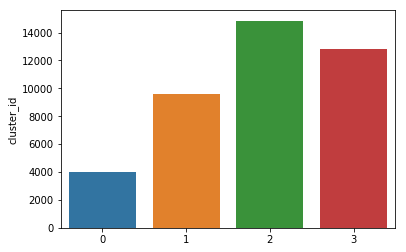

In [69]:
sns.barplot(x=bankcluster.index, y=bankcluster['cluster_id'])